<h1>PROJECT: DATA WRANGLING AND ANALYSIS </h1>

<h2>Table Of Content </h2>
<ul>
    <li>Introduction</li>
    <li><a href="#gathering">Gathering Data</a></li>
    <li>Assessing Data</li>
    <li>Cleaning Data</li>
        <ul>
            <li>Quality</li>
            <li>Tidiness</li>
        </ul>
    <li>Storing, Analyzing, and Visualizing Data</li>
</ul>

<h2> INTRODUTION </h2>



In [1]:
# Import statements for packages used in project
import numpy as np
import pandas as pd
import json
import requests
import json
import os
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h2>GATHERING DATA </h2>
<a id="gathering"></a>

In [2]:
# Read the twitter archive from local storage.
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Download the image predictions programatically
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
df_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

<code>

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
</code>

In [4]:
# Read the .txt file line by line into a list of dictionaries
tweet_list = []
for tweet in open('tweet-json.txt', 'r'):
    tweet_data = json.loads(tweet)
    tweet_list.append({'tweet_id': tweet_data['id_str'],
                        'retweet_count': tweet_data['retweet_count'],
                        'favorite_count': tweet_data['favorite_count'],
                        'followers_count': tweet_data['user']['followers_count']})

In [5]:
# Convert the list of dictionaries to a pandas DataFrame
tweet_json = pd.DataFrame(tweet_list, columns = ['tweet_id','retweet_count',
                                                 'favorite_count', 'followers_count'])

In [6]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


<h2> Assessing data </h2>

In [7]:
# Assess df_archive dataframe Visually
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
# Assess df_prediction dataframe Visually
df_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
# Assess tweet_json dataframe Visually
tweet_json

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


In [10]:
#Check the df_archive information
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The result above shows that there are 2356 entries. 6 columes have incomplete data reporting less than 2356 values.

In [11]:
#check for unique values values
(df_archive.tweet_id.nunique())

2356

In [12]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [13]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [14]:
# View the source values
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
#View the name values
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [16]:
#View info for df_prediction dataframe
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
#Check for tweet_id unique values on the df_prediction data frame
df_prediction.tweet_id.nunique()

2075

In [18]:
df_prediction.jpg_url.nunique()

2009

In [19]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


<h2> Quality </h2><br>
<h3> df_archive table </h3>
<br>
<ul>
    <li>The source value is in HTML format. It should be in strings</li>
    <li>"None" is not a dog name, remove values with "none".</li>
    <li>Missing URLs in expanded_urls</li>
    <li>Drop rows with NA in the retweeted_status_id </li>
    <li> Change source type to Category  </li>
    <li>Erroneous datatype (tweet_id)</li>
</ul>
<br>
<h3> df_prediction table </h3>
<ul>
    <li>Remove duplicate jpg_url entries</li>
    <li>Missing images</li>
    <li> Drop image number column </li>
    <li>Erroneous datatype (tweet_id)</li>
</ul>
<br>
<h3> tweet_json table </h3>
<ul>
    <li>Erroneous datatype (tweet_id)</li>
</ul>

<h2> Tidiness </h2>
<ul>
    <li> The columns on the df_prediction table should be on the archive table. </li>
    <li> The tweet_json should be merged with the archive table.</li>
    <li> The dog stages should be a column </li>

<h2> Cleaning Data </h2>

In [20]:
# Make copies of the original dataframe
df_archive_clean = df_archive.copy()
df_prediction_clean = df_prediction.copy()
tweet_json_clean = tweet_json.copy()

In [21]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<h3> Define </h3>
<ul>
    <li> Drop rows with NA in the retweeted_status_id </li>
 </ul>
 <h3> Code </h3>

In [22]:
# Remove rows that have values in the retweeted_status_id column
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]

In [23]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

<h3> Define </h3>
<ul>
    <li> Drop columns that will not be needed for the analysis </li>
 </ul>
 <h3> Code </h3>

In [24]:
#drop columns
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], axis=1)  

<h3> Test </h3>

In [25]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


<h3> Define </h3>
<ul>
    <li> Remove Invalid Names </li>
    
    source: https://stackoverflow.com/questions/50599934/removing-rows-from-dataframe-whose-first-letter-is-in-lowercase
    
</ul>
<h3> Code </h3>

In [26]:
df_archive_clean = df_archive_clean[df_archive_clean.name != 'None']
df_archive_clean = df_archive_clean[df_archive_clean.name.str[0].str.isupper()]

<h3> Test </h3>

In [27]:
df_archive_clean.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
2141     Zoey
115      Zoey
8        Zoey
151     Zooey
1875     Zuzu
Name: name, Length: 1391, dtype: object

<h3> Define </h3>
<ul>
    <li> Extract Source As String </li>
</ul>
<h3> Code </h3>

In [28]:
df_archive_clean.source = df_archive_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

<h3> Test </h3>

In [29]:
df_archive_clean.source.value_counts()

Twitter for iPhone     1325
Vine - Make a Scene      41
Twitter Web Client       16
TweetDeck                 9
Name: source, dtype: int64

<h3> Define </h3>
<ul>
    <li>Remove duplicate url </li>
</ul>

<h3> Code </h3>

In [30]:
df_prediction_clean.drop_duplicates(subset=['jpg_url'], inplace=True)

<h3> Test </h3>

In [31]:
df_prediction_clean.jpg_url.duplicated().sum()

0

<h3> Define </h3>
<ul>
    <li>Drop img_num column</li>
</ul>

<h3> Code </h3>

In [32]:
df_prediction_clean.drop(['img_num'], axis=1, inplace=True)

<h3> Test </h3>

In [33]:
df_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   p1        2009 non-null   object 
 3   p1_conf   2009 non-null   float64
 4   p1_dog    2009 non-null   bool   
 5   p2        2009 non-null   object 
 6   p2_conf   2009 non-null   float64
 7   p2_dog    2009 non-null   bool   
 8   p3        2009 non-null   object 
 9   p3_conf   2009 non-null   float64
 10  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 147.1+ KB


In [34]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [35]:
#Convert to int to enable merging
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype('int')

<br>

<h2> TIDINESS </h2>
<h3> Define </h3>
<ul>
    <li> Merge the tables together </li>
</ul>
<h3>Code</h3>

In [36]:
#merge the two tables
df_archive_clean = pd.merge(left=df_archive_clean, right=df_prediction, how='left', on='tweet_id')
df_archive_clean = pd.merge(left=df_archive_clean, right=tweet_json_clean, how='left', on='tweet_id')

<h3> Test </h3>

In [37]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1390
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1391 non-null   int64  
 1   timestamp           1391 non-null   object 
 2   source              1391 non-null   object 
 3   text                1391 non-null   object 
 4   rating_numerator    1391 non-null   int64  
 5   rating_denominator  1391 non-null   int64  
 6   name                1391 non-null   object 
 7   doggo               1391 non-null   object 
 8   floofer             1391 non-null   object 
 9   pupper              1391 non-null   object 
 10  puppo               1391 non-null   object 
 11  jpg_url             1350 non-null   object 
 12  img_num             1350 non-null   float64
 13  p1                  1350 non-null   object 
 14  p1_conf             1350 non-null   float64
 15  p1_dog              1350 non-null   object 
 16  p2    

<h3> Define </h3>
<ul>
    <li>Change tweet_id to type Object </li>
</ul>

<h3> Code </h3>

In [38]:
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype('object')

<h3> Test </h3>

In [39]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1390
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1391 non-null   object 
 1   timestamp           1391 non-null   object 
 2   source              1391 non-null   object 
 3   text                1391 non-null   object 
 4   rating_numerator    1391 non-null   int64  
 5   rating_denominator  1391 non-null   int64  
 6   name                1391 non-null   object 
 7   doggo               1391 non-null   object 
 8   floofer             1391 non-null   object 
 9   pupper              1391 non-null   object 
 10  puppo               1391 non-null   object 
 11  jpg_url             1350 non-null   object 
 12  img_num             1350 non-null   float64
 13  p1                  1350 non-null   object 
 14  p1_conf             1350 non-null   float64
 15  p1_dog              1350 non-null   object 
 16  p2    

<h3> Define </h3>
<ul>
    <li>Drop rows with NA </li>
</ul>

<h3> Code </h3>

In [40]:
df_archive_clean.dropna(inplace=True)

<h3> Test </h3>

In [41]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 0 to 1390
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1350 non-null   object 
 1   timestamp           1350 non-null   object 
 2   source              1350 non-null   object 
 3   text                1350 non-null   object 
 4   rating_numerator    1350 non-null   int64  
 5   rating_denominator  1350 non-null   int64  
 6   name                1350 non-null   object 
 7   doggo               1350 non-null   object 
 8   floofer             1350 non-null   object 
 9   pupper              1350 non-null   object 
 10  puppo               1350 non-null   object 
 11  jpg_url             1350 non-null   object 
 12  img_num             1350 non-null   float64
 13  p1                  1350 non-null   object 
 14  p1_conf             1350 non-null   float64
 15  p1_dog              1350 non-null   object 
 16  p2    

In [42]:
(df_archive_clean['doggo'] + df_archive_clean['floofer'] + df_archive_clean['pupper'] + df_archive_clean['puppo']).value_counts()

NoneNoneNoneNone       1173
NoneNonepupperNone      117
doggoNoneNoneNone        36
NoneNoneNonepuppo        15
NoneflooferNoneNone       5
doggoNonepupperNone       4
dtype: int64

<h3> Define </h3>
<ul>
    <li> Combine stages to make a column </li>
 </ul>
 
 Source: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
 
 <h3> Code </h3>

In [43]:
def stages (row):
   if (row['doggo'] + row['floofer'] + row['pupper'] + row['puppo']).count('None') == 2 :
      return 'Multiple'
   if row['doggo'].count('doggo') == 1 :
      return 'doggo'
   if row['floofer'].count('floofer') == 1 :
      return 'floofer'
   if row['pupper'].count('pupper') == 1:
      return 'pupper'
   if row['puppo'].count('puppo')  == 1:
      return 'puppo'
   return 'None'

In [44]:
#Create Column to merge other columns
df_archive_clean['dog_stages'] = df_archive_clean.apply(lambda row: stages(row), axis=1)

In [45]:
#drop Columns not needed
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace= True)

<h3> Test </h3>

In [46]:
df_archive_clean['dog_stages'].value_counts()

None        1173
pupper       117
doggo         36
puppo         15
floofer        5
Multiple       4
Name: dog_stages, dtype: int64

<h2> Save Cleaned Data </h2>

In [47]:
df_archive_clean.to_csv('twitter_archive_master.csv', index=False) 

<h2> Analyzing, and Visualizing Data </h2>

In [48]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [49]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1350 non-null   int64  
 1   timestamp           1350 non-null   object 
 2   source              1350 non-null   object 
 3   text                1350 non-null   object 
 4   rating_numerator    1350 non-null   int64  
 5   rating_denominator  1350 non-null   int64  
 6   name                1350 non-null   object 
 7   jpg_url             1350 non-null   object 
 8   img_num             1350 non-null   float64
 9   p1                  1350 non-null   object 
 10  p1_conf             1350 non-null   float64
 11  p1_dog              1350 non-null   bool   
 12  p2                  1350 non-null   object 
 13  p2_conf             1350 non-null   float64
 14  p2_dog              1350 non-null   bool   
 15  p3                  1350 non-null   object 
 16  p3_con

In [50]:
#twitter_archive_master.source = twitter_archive_master.source.astype("category")

> Insight 1: What is the most used twitter source

In [51]:
source = twitter_archive_master.source.value_counts(normalize=True)

In [52]:
source

Twitter for iPhone    0.981481
Twitter Web Client    0.011852
TweetDeck             0.006667
Name: source, dtype: float64

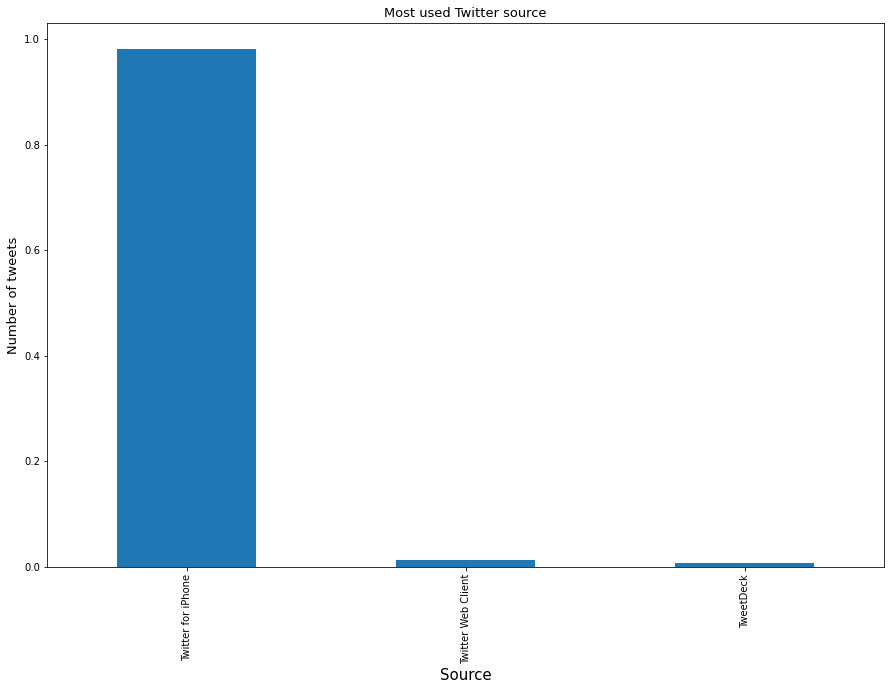

In [53]:
source.plot(kind='bar', figsize=(15,10));
#Add labels
plt.title('Most used Twitter source', color = 'black', fontsize = '13')
plt.xlabel('Source', color = 'black', fontsize = '15')
plt.ylabel('Number of tweets', color = 'black', fontsize = '13');

> Insight 2: What is the Most Common Name

In [54]:
dog_names = twitter_archive_master.name.value_counts()

In [55]:
popular_dog_names = twitter_archive_master.name.value_counts()[0:10]

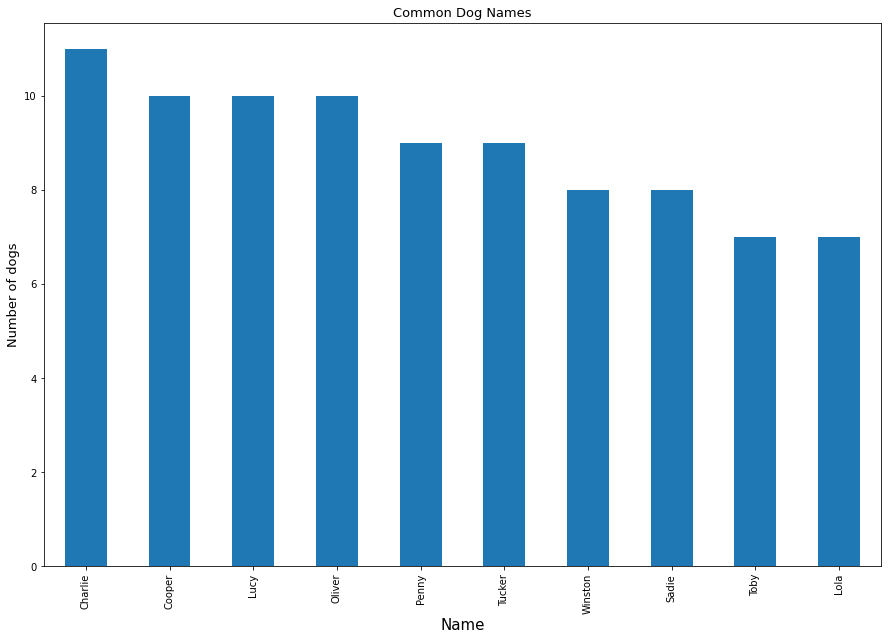

In [56]:
popular_dog_names.plot(kind='bar', figsize=(15,10))
plt.title('Common Dog Names', color = 'black', fontsize = '13')
plt.xlabel('Name', color = 'black', fontsize = '15')
plt.ylabel('Number of dogs', color = 'black', fontsize = '13');

> Insight 3: Correlation Between Favorite and Retweet

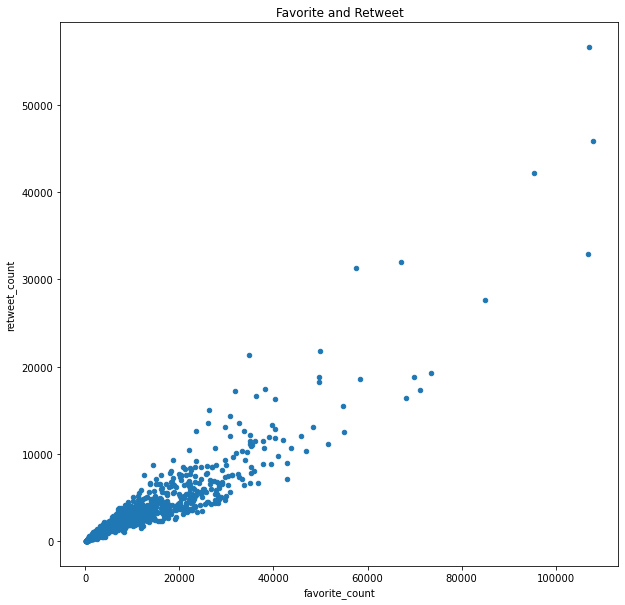

In [57]:
# Correlation between profit and budget
twitter_archive_master.plot(x='favorite_count', y='retweet_count', kind='scatter',
                            title = 'Favorite and Retweet', figsize = (10,10));

In [58]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.9216915670222553